# Import the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Data Collection and Analysis

### Import the Dataset

In [ ]:
dataset = pd.read_csv('/content/train.csv')

### Exploratory Data Analysis

In [ ]:
dataset.shape

(25000, 65)

> 25000 rows, 65 columns

In [ ]:
dataset.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
0,14,41,0,11,0,0,0,6,True,False,...,True,True,True,True,True,True,True,True,True,0
1,2,30,0,12,0,0,1,9,True,False,...,True,False,True,True,True,True,True,False,True,1
2,5,66,0,22,1,0,2,9,True,False,...,True,True,True,True,True,True,True,True,True,1
3,3,63,0,8,0,0,0,8,True,False,...,True,True,True,True,True,True,True,True,True,1
4,5,40,0,6,0,0,1,9,True,False,...,True,True,True,True,True,True,True,True,False,0


In [ ]:
dataset.drop(dataset.columns[17:22], axis=1,inplace=True)

In [ ]:
dataset.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
0,14,41,0,11,0,0,0,6,True,False,...,True,True,True,True,True,True,True,True,True,0
1,2,30,0,12,0,0,1,9,True,False,...,True,False,True,True,True,True,True,False,True,1
2,5,66,0,22,1,0,2,9,True,False,...,True,True,True,True,True,True,True,True,True,1
3,3,63,0,8,0,0,0,8,True,False,...,True,True,True,True,True,True,True,True,True,1
4,5,40,0,6,0,0,1,9,True,False,...,True,True,True,True,True,True,True,True,False,0


In [ ]:
dataset.shape

(25000, 60)

> 25000 rows, 60 columns

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 60 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   time_in_hospital                          25000 non-null  int64
 1   num_lab_procedures                        25000 non-null  int64
 2   num_procedures                            25000 non-null  int64
 3   num_medications                           25000 non-null  int64
 4   number_outpatient                         25000 non-null  int64
 5   number_emergency                          25000 non-null  int64
 6   number_inpatient                          25000 non-null  int64
 7   number_diagnoses                          25000 non-null  int64
 8   race_Caucasian                            25000 non-null  bool 
 9   race_AfricanAmerican                      25000 non-null  bool 
 10  gender_Female                             25000 non-null  

In [ ]:
dataset['readmitted'].value_counts()

0    13590
1    11410
Name: readmitted, dtype: int64

> 0 => Not readmitted

> 1 => readmitted

In [ ]:
dataset.isnull().sum()

time_in_hospital                            0
num_lab_procedures                          0
num_procedures                              0
num_medications                             0
number_outpatient                           0
number_emergency                            0
number_inpatient                            0
number_diagnoses                            0
race_Caucasian                              0
race_AfricanAmerican                        0
gender_Female                               0
age_[70-80)                                 0
age_[60-70)                                 0
age_[50-60)                                 0
age_[80-90)                                 0
age_[40-50)                                 0
payer_code_?                                0
medical_specialty_InternalMedicine          0
medical_specialty_Emergency/Trauma          0
medical_specialty_Family/GeneralPractice    0
medical_specialty_Cardiology                0
diag_1_428                        

In [ ]:
dataset.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000
mean,4.395640,42.96012,1.341080,15.988440,0.365920,0.203280,0.64300,7.420160,0.456400
std,2.991165,19.76881,1.705398,8.107743,1.224419,0.982973,1.26286,1.940932,0.498105
min,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,2.000000,31.00000,0.000000,10.000000,0.000000,0.000000,0.00000,6.000000,0.000000
50%,4.000000,44.00000,1.000000,15.000000,0.000000,0.000000,0.00000,8.000000,0.000000
75%,6.000000,57.00000,2.000000,20.000000,0.000000,0.000000,1.00000,9.000000,1.000000
max,14.000000,126.00000,6.000000,81.000000,36.000000,64.000000,21.00000,16.000000,1.000000


In [ ]:
dataset.groupby('readmitted').mean()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,examide_No,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes
readmitted,,,,,,,,,,,,,,,,,,,,,
0,4.237822,42.233996,1.419132,15.569610,0.268212,0.112656,0.392494,7.200662,0.731273,0.192494,...,1.0,1.0,0.490802,0.994923,0.999926,1.000000,1.0,1.0,0.565489,0.744224
1,4.583611,43.824978,1.248116,16.487292,0.482296,0.311218,0.941367,7.681595,0.755039,0.192901,...,1.0,1.0,0.442331,0.992112,0.999737,0.999912,1.0,1.0,0.515337,0.795004


### Data VIsualization 

<Axes: xlabel='time_in_hospital', ylabel='count'>

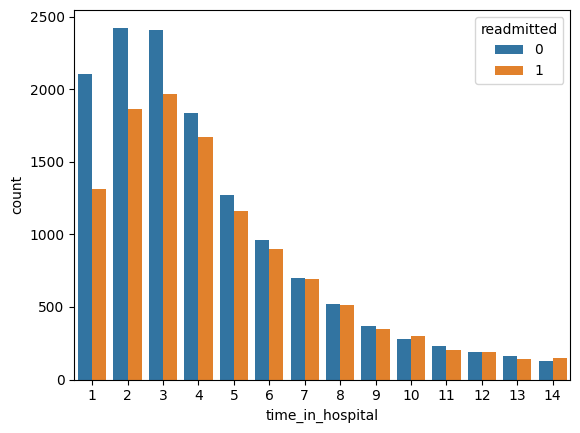

In [ ]:
sns.countplot(x='time_in_hospital', hue='readmitted', data=dataset)

<Axes: xlabel='num_procedures', ylabel='count'>

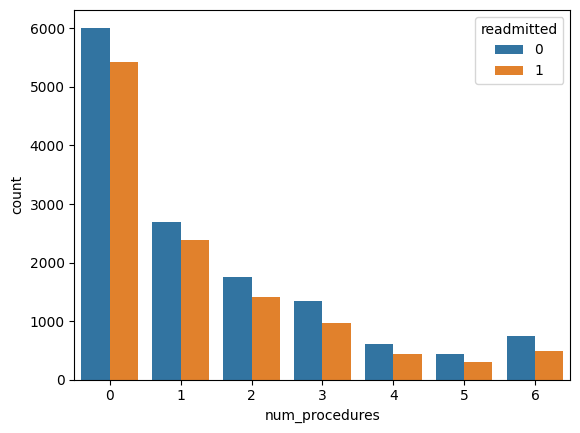

In [ ]:
sns.countplot(x='num_procedures', hue='readmitted', data=dataset)

# Pre-Processing

### Replace Categorical with Numerical

In [ ]:
columns = dataset.columns[8:58]
dataset = pd.get_dummies(dataset, columns=columns)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 105 entries, time_in_hospital to change_No_True
dtypes: bool(1), int64(9), uint8(95)
memory usage: 4.0 MB


### Splitting features and target

In [ ]:
X = dataset.drop('readmitted', axis=1)
y = dataset['readmitted']

### Standardizing the features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Split to train and test 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)

In [ ]:
X.shape, X_train.shape, X_test.shape

((25000, 104), (18750, 104), (6250, 104))

# Train

### RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=500, max_depth=15)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=500)

# Model Evaluation

In [ ]:
y_pred_train = model.predict(X_train)
train_acc = accuracy_score(y_pred_train, y_train)

y_pred_test = model.predict(X_test)
test_acc = accuracy_score(y_pred_test, y_test)

train_acc, test_acc

(0.8365866666666667, 0.64112)

> The Model got an accuracy equals to 64% on data it never seen before